In [87]:
import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt
import math

In [88]:
image = cv2.imread('/home/juanca632/PersonalProjects/stage/wavelet-transform/image_gray.jpg', cv2.IMREAD_GRAYSCALE)

[[145 198 137 ...   9 108  83]
 [123 111  39 ... 211  84  50]
 [188 207 252 ... 128  41 241]
 ...
 [125 196 177 ... 248 190  94]
 [ 18 183 141 ...  21 189 163]
 [188 216  46 ... 106 146 130]]


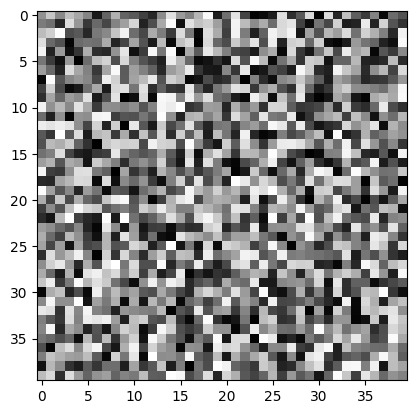

In [89]:
# Crear una matriz 10x10 con valores aleatorios enteros entre 0 y 255
matrix = np.random.randint(0, 256, size=(40, 40))

# Imprimir la matriz
print(matrix)
plt.imshow(matrix,  cmap="gray")
plt.show()

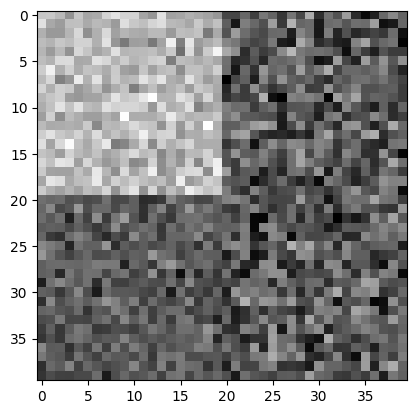

In [90]:
# matrix = cv2.imread("/home/juanca632/PersonalProjects/stage/wavelet-transform/descarga.jpg", cv2.IMREAD_GRAYSCALE)

def haar_wavelet_transform(matrix):
    n = int(matrix.shape[0])
    n_half = int(n /2)
    transformed_matrix = np.zeros((n,n))

    if(n >= 2):
        for i in range(0, n):
            aux = 0
            aux2 = int(n_half + aux)
            for j in range(0, n, 2):

                sum = (matrix[i, j] + matrix[i, j+1]) / 2
                dif = (matrix[i, j] - matrix[i, j+1]) / 2
                transformed_matrix[i,aux] = sum
                transformed_matrix[i,aux2] = dif
                aux = aux + 1
                aux2 = aux2 + 1
        transformed_matrix2 = np.copy(transformed_matrix)
        for j in range(0, n_half):
            aux = 0
            aux2 = int(n_half + aux)
            for i in range(0, n, 2):

                sum = (transformed_matrix[i, j] + transformed_matrix[i+1, j]) / 2
                dif = (transformed_matrix[i, j] - transformed_matrix[i+1, j]) / 2

                transformed_matrix2[aux,j] = sum
                transformed_matrix2[aux2,j] = dif
                aux = aux + 1
                aux2 = aux2 + 1

        transformed_matrix3 = transformed_matrix2[:n_half,:n_half]

    return transformed_matrix2, transformed_matrix3

image_result, image_aprox = haar_wavelet_transform(matrix)

# print(matrix)
# print("\n")
# print(image_result)
plt.imshow(image_result,  cmap="gray")
plt.show()



[[145 198 137 ...   9 108  83]
 [123 111  39 ... 211  84  50]
 [188 207 252 ... 128  41 241]
 ...
 [125 196 177 ... 248 190  94]
 [ 18 183 141 ...  21 189 163]
 [188 216  46 ... 106 146 130]]



[[145. 198. 137. ...   9. 108.  83.]
 [123. 111.  39. ... 211.  84.  50.]
 [188. 207. 252. ... 128.  41. 241.]
 ...
 [125. 196. 177. ... 248. 190.  94.]
 [ 18. 183. 141. ...  21. 189. 163.]
 [188. 216.  46. ... 106. 146. 130.]]


Text(0.5, 1.0, 'Reconstruida')

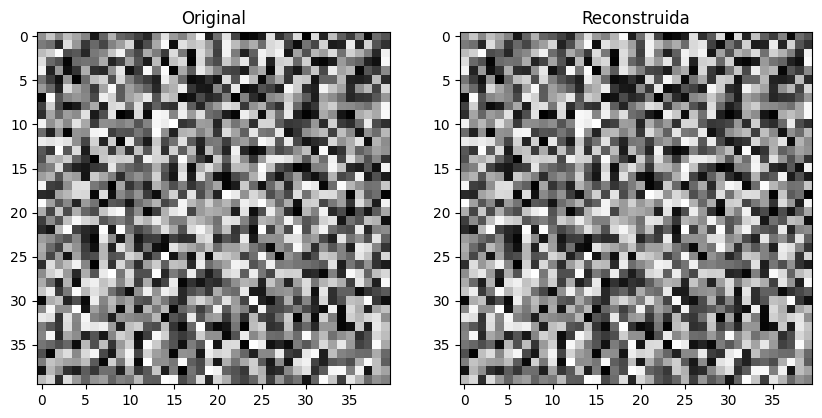

In [91]:
def inverse_haar_wavelet_transform(transformed_matrix):
    n = transformed_matrix.shape[0]
    n_half = n // 2
    reconstructed_matrix = np.copy(transformed_matrix)

    if n >= 2:
        # # Reconstrucción vertical
        for j in range(n_half):
            aux = 0
            aux2 = n_half + aux
            for i in range(0, n, 2):
                s = transformed_matrix[aux, j]
                d = transformed_matrix[aux2, j]
                reconstructed_matrix[i, j] = s + d
                reconstructed_matrix[i + 1, j] = s - d
                aux += 1
                aux2 += 1

        # Reconstrucción horizontal
        reconstructed_matrix2 = np.zeros_like(reconstructed_matrix)
        for i in range(n):
            aux = 0
            aux2 = n_half + aux
            for j in range(0, n, 2):
                s = reconstructed_matrix[i, aux]
                d = reconstructed_matrix[i, aux2]
                reconstructed_matrix2[i, j] = s + d
                reconstructed_matrix2[i, j + 1] = s - d
                aux += 1
                aux2 += 1
        return reconstructed_matrix2

    return transformed_matrix

# Ejemplo de matriz transformada
transformed_matrix = np.array([[6, -2, 0, 0],
                               [5, -1, 1, 0],
                               [2, 0, -2, 0],
                               [1, 1, 1, -3]])

image_original = inverse_haar_wavelet_transform(image_result)

print(matrix)
print("\n\n")
print(image_original)
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(matrix, cmap='gray')
axes[0].set_title('Original')
axes[1].imshow(image_original, cmap='gray')
axes[1].set_title('Reconstruida')
